# Pymaceuticals Inc.
---

### Analysis

- One observation that can be made is that there is a positive correlation between the average tumor volume (mm3) and weight(g). Another observation is that for mice treated with Capomulin had tumor volume decrease as the timepoint (days) increased, indicating a negative correlation and that Capomulin was successful in decreasing tumor volume. Another observation is that for Capomulin treated mice there is correlation between weight and average tumor volume of 0.52 r-value.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
drug_regimen_results = pd.merge(study_results, mouse_metadata, how= "left", on= "Mouse ID")
drr = drug_regimen_results

drr.head()
# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
number_of_mice = drr['Mouse ID'].nunique()
number_of_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = drr.loc[drr.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].nunique
duplicate_mice_ID



<bound method IndexOpsMixin.nunique of 137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object>

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_ID = drr.loc[drr["Mouse ID"] == "g989", :]
duplicate_mice_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
len(duplicate_mice_ID)

13

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = drr[~drr['Mouse ID'].isin(duplicate_mice_ID['Mouse ID'])]
clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].nunique()
clean_mice

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#mean

#median

#variance

#standard dev

#SEM



# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

Drug_regimen_df = clean_df.groupby('Drug Regimen')
mean_tumor = Drug_regimen_df['Tumor Volume (mm3)'].mean()
median_tumor = Drug_regimen_df['Tumor Volume (mm3)'].median()
variance_tumor = Drug_regimen_df['Tumor Volume (mm3)'].var()
std_tumor = Drug_regimen_df['Tumor Volume (mm3)'].std()
SEM_tumor = Drug_regimen_df['Tumor Volume (mm3)'].sem()

Regimen_tumor_volume_summary = pd.DataFrame ({'Mean Tumor Volume': mean_tumor,
                                              'Median Tumor Volume': median_tumor,
                                              'Tumor Volume Variance':variance_tumor,
                                              'Tumor Volume Std. Dev.':std_tumor,
                                              'Tumor Volume Std. Err.':SEM_tumor})

Regimen_tumor_volume_summary



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Drug_regimen_df.agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [11]:
mice_count_timepoints = clean_df["Drug Regimen"].value_counts()

Text(0, 0.5, '# of Observed Mouse Timepoints')

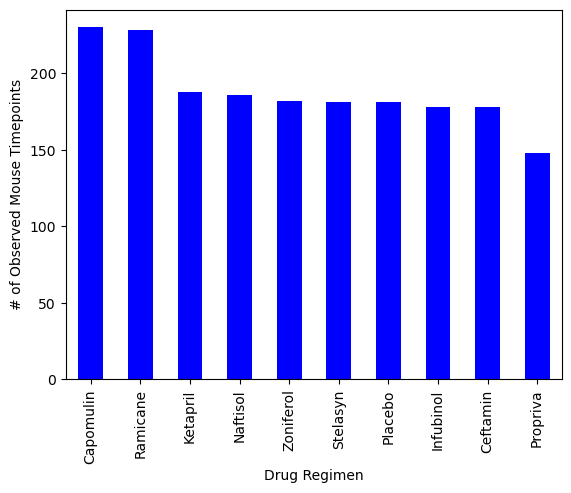

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


plot_pandas = mice_count_timepoints.plot.bar(color='b')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')



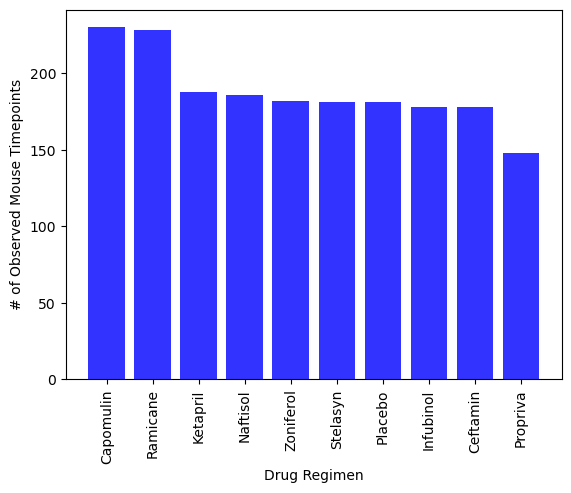

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count_timepoints.index.values
y_axis = mice_count_timepoints.values

plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

#labels for x & y, rotate x axis titles
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()

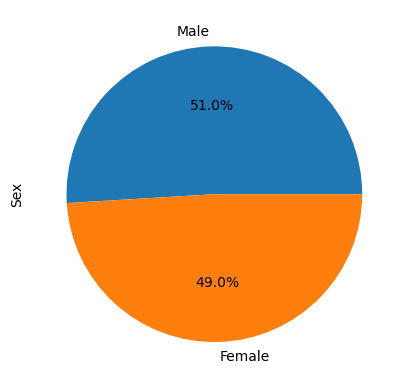

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_mice_data = clean_df["Sex"].value_counts()
gender_mice_data.plot.pie(autopct= "%1.1f%%")
plt.ylabel('Sex')
plt.show()

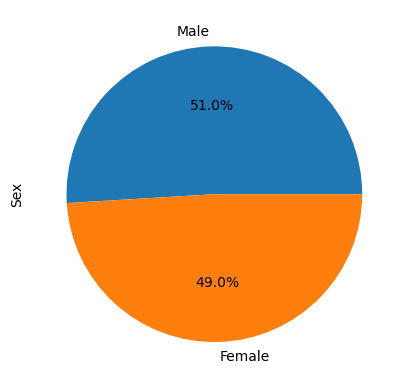

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
size = [49, 50]
plot = gender_mice_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data_lasttp = last_timepoint.merge(clean_df, on=["Mouse ID", "Timepoint"], how="left")
merged_data_lasttp

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [17]:
print(merged_data_lasttp['Drug Regimen'].value_counts())


Drug Regimen
Infubinol    25
Placebo      25
Ceftamin     25
Zoniferol    25
Ramicane     25
Ketapril     25
Naftisol     25
Capomulin    25
Stelasyn     24
Propriva     24
Name: count, dtype: int64


In [18]:
print(last_timepoint)

    Mouse ID  Timepoint
0       a203         45
1       a251         45
2       a262         45
3       a275         45
4       a366         30
..       ...        ...
243     z435         10
244     z578         45
245     z581         45
246     z795         45
247     z969         45

[248 rows x 2 columns]


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
total_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_data_lasttp.loc[merged_data_lasttp["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    # add subset 
    total_tumor_vol.append({"Tumor Volume (mm3)":tumor_vol , 
                            'Treatment':drug,
                            })
    selected_data = total_tumor_vol
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq= quartiles[0.25]
    upperq= quartiles[0.75]
    iqr= upperq-lowerq

    lower_bound= lowerq - (1.5*iqr)
    upper_bound= lowerq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"For {drug}, the outliers are : {outliers}")    


For Capomulin, the outliers are : 80     47.685963
162    46.539206
Name: Tumor Volume (mm3), dtype: float64
For Ramicane, the outliers are : 157    45.220869
Name: Tumor Volume (mm3), dtype: float64
For Infubinol, the outliers are : 27    72.226731
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are : Series([], Name: Tumor Volume (mm3), dtype: float64)


In [32]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = selected_data[ "Capomulin","Ramicane", "Infubinol", "Ceftamin"]

boxplot_list = []

for drug in treatments:
    boxplot_list.append(list(last_timepoint[drug].dropna()))

fig= plt.subplots()
plt.xticks([1,2,3,4],treatments)
plt.boxplot(boxplot_list)
plt.show()


TypeError: list indices must be integers or slices, not tuple

## Line and Scatter Plots

In [21]:
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [22]:
Cap_l509_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",: ]
Cap_l509_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21


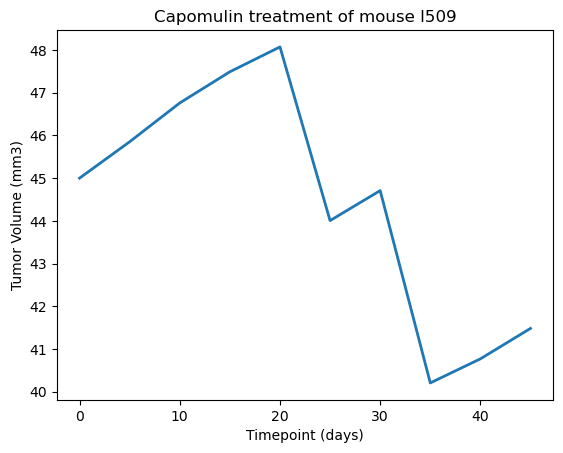

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x_axis_Timepoint = Cap_l509_df["Timepoint"]
tumor_vol_cap_l509 = Cap_l509_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatment of mouse l509')
plt.plot(x_axis_Timepoint, tumor_vol_cap_l509,linewidth=2, markersize=12)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

In [24]:
Capomulin_df.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

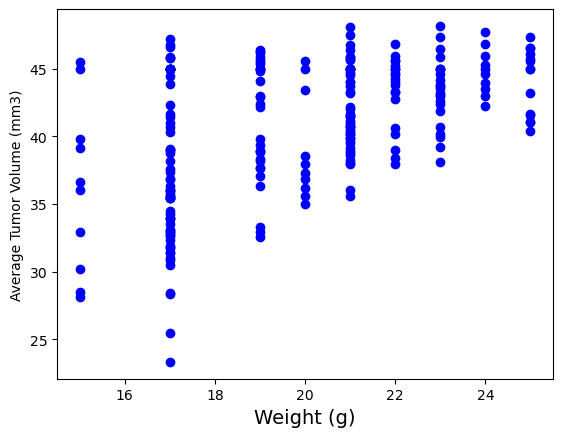

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig, ax = plt.subplots()
# mean_capomulin_vol = Capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(Capomulin_df["Weight (g)"], Capomulin_df["Tumor Volume (mm3)"], color="blue")
plt.xlabel('Weight (g)',fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

PearsonRResult(statistic=0.525699555207717, pvalue=9.60544662950128e-18)


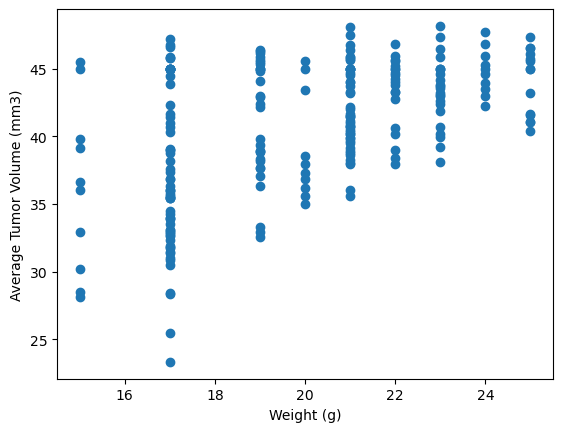

In [34]:
# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr(Capomulin_df['Weight (g)'],Capomulin_df['Tumor Volume (mm3)'])
print(correlation)
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

fig, ax = plt.subplots()
ax.scatter(Capomulin_df['Weight (g)'], Capomulin_df['Tumor Volume (mm3)'])
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Average Tumor Volume (mm3)')
plt.show()